In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.svm import SVC
from nltk import ConfusionMatrix 
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [2]:
uscities_df = pd.read_csv("Clean_data/City_Updated_JS.csv")
pd.set_option("display.max_rows", 100)
uscities_df

,city,state_id,state_name,population,density
0,New York,NY,New York,18713220,10715
1,Los Angeles,CA,California,12750807,3276
2,Chicago,IL,Illinois,8604203,4574
3,Miami,FL,Florida,6445545,5019
4,Dallas,TX,Texas,5743938,1526
...,...,...,...,...,...
28333,Gross,NE,Nebraska,2,6
28334,Lotsee,OK,Oklahoma,2,39
28335,The Ranch,MN,Minnesota,2,2
28336,Shamrock,OK,Oklahoma,2,2


In [3]:
income_df = pd.read_csv("Clean_data/income_updated_JS.csv",engine='python')
income_df = income_df.rename(columns={"City": "city", "State_Name": "state_name", "State_ab": "state_id"})
income_df = income_df.groupby(["city", "state_name"], as_index=False).agg({"state_id": "first", "ALand": "mean", "AWater": "mean", "Median": "mean", "Stdev": "mean"})
pd.set_option("display.max_rows", 1000)
income_df


,city,state_name,state_id,ALand,AWater,Median,Stdev
0,Abbeville,Alabama,AL,8.970592e+07,1.390840e+05,25216.000000,39126.000000
1,Abbeville,Louisiana,LA,8.357011e+07,1.004953e+08,25628.333333,21177.666667
2,Abbeville,South Carolina,SC,1.053923e+08,1.623000e+06,32245.000000,41647.333333
3,Abbotsford,Wisconsin,WI,1.051618e+08,3.842430e+05,44919.000000,48933.000000
4,Aberdeen,Maryland,MD,2.883998e+07,2.077533e+06,80370.000000,64102.000000
...,...,...,...,...,...,...,...
11222,Zionsville,Indiana,IN,1.141125e+08,9.399300e+04,73710.000000,51584.000000
11223,Zolfo Springs,Florida,FL,4.522628e+06,0.000000e+00,32041.000000,29600.000000
11224,Zumbrota,Minnesota,MN,1.012979e+08,9.444000e+04,45387.000000,44259.500000
11225,Zuni,New Mexico,NM,3.321720e+07,0.000000e+00,36914.000000,41463.000000


In [4]:
outcome_df = pd.read_csv("Clean_data/mental_updated.csv")
outcome_df = outcome_df.rename(columns={"State_name": "state_name", "State_ab": "state_id"})
outcome_df

,city,state_id,state_name,Low_Confidence_Limit,Data_Value,High_Confidence_Limit,PopulationCount
0,Abilene,TX,Texas,13.741026,15.053846,16.346154,9004.692308
1,Akron,OH,Ohio,15.933824,17.227941,18.564706,8784.176471
2,Alameda,CA,California,9.211111,10.083333,11.033333,12302.000000
3,Albany,GA,Georgia,14.456364,15.961818,17.509091,9561.272727
4,Albuquerque,NM,New Mexico,12.920863,14.153237,15.425180,11780.611510
5,Alexandria,VA,Virginia,9.555000,10.552500,11.760000,10497.450000
6,Alhambra,CA,California,9.213636,10.077273,10.959091,11330.318180
7,Allen,TX,Texas,9.684615,10.700000,11.792308,19441.384620
8,Allentown,PA,Pennsylvania,16.385714,17.653571,18.967857,12646.285710
9,Amarillo,TX,Texas,13.403509,14.601754,15.815789,10036.578950


In [5]:
merged_df = pd.merge(outcome_df, uscities_df, on=['city', 'state_id'], how='left').merge(income_df,on=['city', 'state_id'], how='left')
merged_df = merged_df.rename(columns={"state_name_x": "state_name"})
merged_df = merged_df.drop('state_name_y', axis=1)
merged_df = merged_df.drop(['population'], axis=1)
#pd.set_option("display.max_rows", 500)
merged_df

,city,state_id,state_name,Low_Confidence_Limit,Data_Value,High_Confidence_Limit,PopulationCount,density,state_name,ALand,AWater,Median,Stdev
0,Abilene,TX,Texas,13.741026,15.053846,16.346154,9004.692308,446,Texas,5.132188e+06,1.595392e+04,79425.538462,38462.769231
1,Akron,OH,Ohio,15.933824,17.227941,18.564706,8784.176471,1231,Ohio,5.736327e+06,1.932701e+05,50195.685714,38406.742857
2,Alameda,CA,California,9.211111,10.083333,11.033333,12302.000000,2868,California,1.308179e+06,4.242375e+05,72782.250000,71335.125000
3,Albany,GA,Georgia,14.456364,15.961818,17.509091,9561.272727,505,Georgia,4.939914e+07,7.184542e+05,54255.461538,40806.615385
4,Albuquerque,NM,New Mexico,12.920863,14.153237,15.425180,11780.611510,1155,New Mexico,3.252112e+07,1.001256e+05,97945.813559,46159.627119
5,Alexandria,VA,Virginia,9.555000,10.552500,11.760000,10497.450000,4121,Virginia,2.610180e+06,1.335945e+05,149468.937500,60584.562500
6,Alhambra,CA,California,9.213636,10.077273,10.959091,11330.318180,4237,California,8.927026e+05,0.000000e+00,59440.111111,57842.777778
7,Allen,TX,Texas,9.684615,10.700000,11.792308,19441.384620,1544,Texas,1.098638e+07,3.478700e+04,181360.200000,57907.200000
8,Allentown,PA,Pennsylvania,16.385714,17.653571,18.967857,12646.285710,2672,Pennsylvania,2.536574e+06,6.869100e+04,40375.642857,42076.928571
9,Amarillo,TX,Texas,13.403509,14.601754,15.815789,10036.578950,756,Texas,9.648345e+07,1.395202e+06,92547.040000,41992.480000


In [6]:
#merged_df.loc[pd.isna(merged_df["population"]), :].index
merged_df.isnull().sum(axis = 0)

city                     0
state_id                 0
state_name               0
Low_Confidence_Limit     0
Data_Value               0
High_Confidence_Limit    0
PopulationCount          0
density                  0
state_name               0
ALand                    0
AWater                   0
Median                   0
Stdev                    0
dtype: int64

array([[<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'ALand'}>],
       [<AxesSubplot:title={'center':'AWater'}>,
        <AxesSubplot:title={'center':'Median'}>],
       [<AxesSubplot:title={'center':'Stdev'}>,
        <AxesSubplot:title={'center':'PopulationCount'}>]], dtype=object)

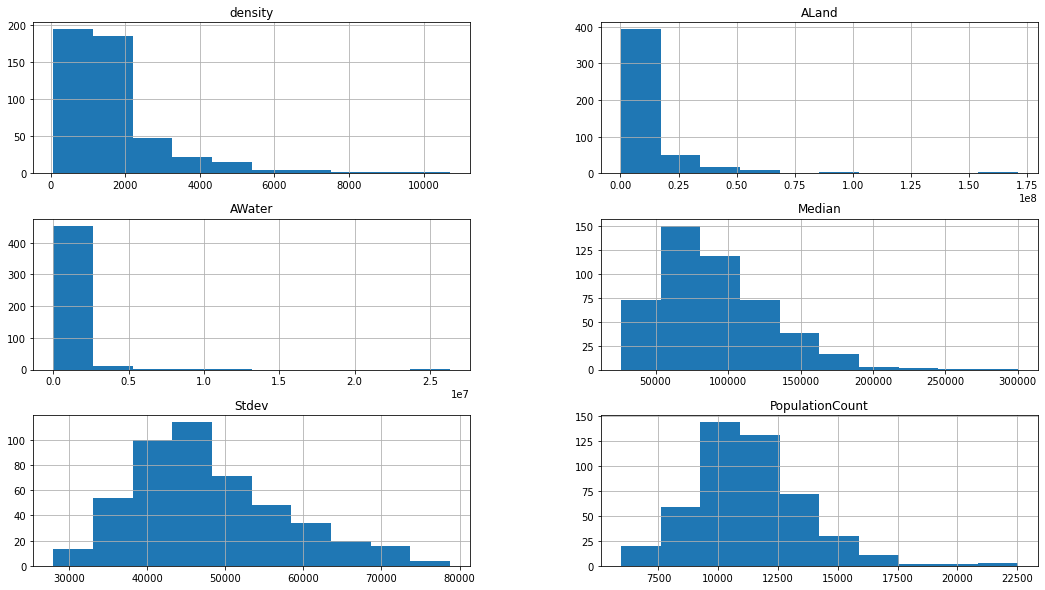

In [7]:
# Visual exploratory for outlier identification 
merged_df.hist(['density','ALand','AWater','Median','Stdev','PopulationCount'], figsize=(18,10))

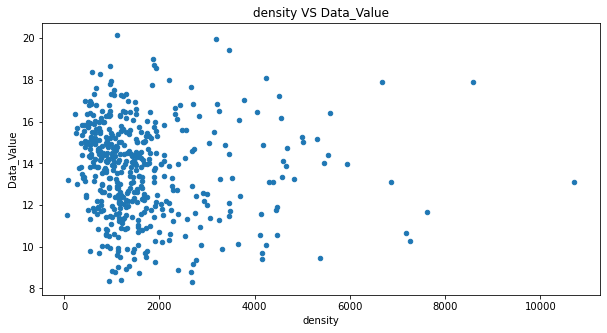

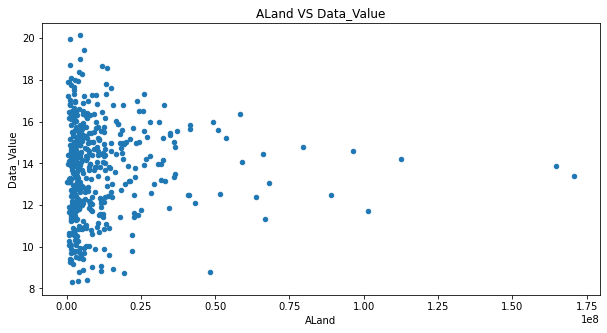

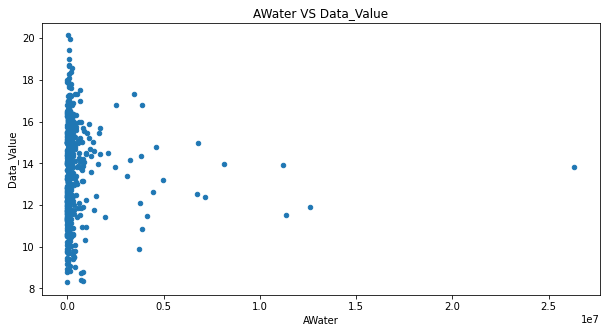

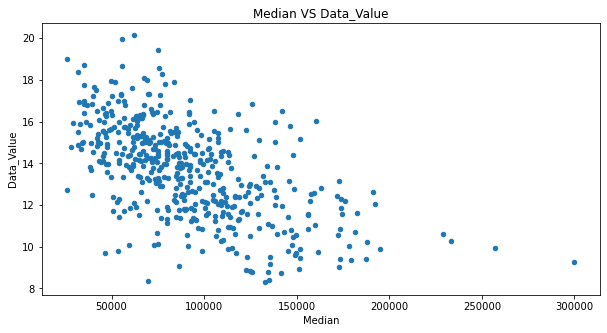

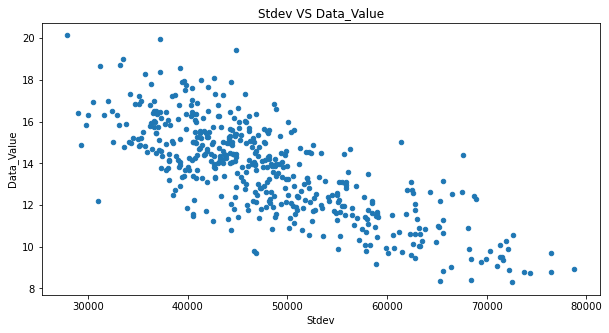

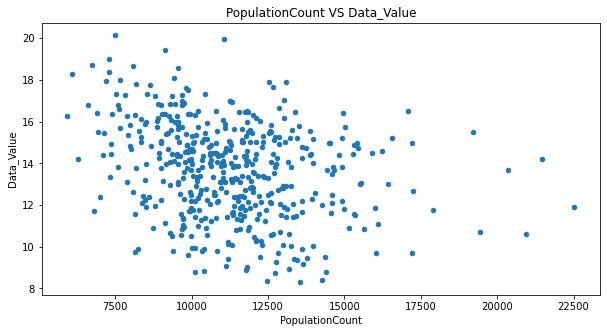

In [8]:
# Feature selection using relationship exploration
ContinuousCols=['density','ALand','AWater','Median','Stdev','PopulationCount']
for predictor in ContinuousCols:
      merged_df.plot.scatter(x=predictor, y='Data_Value', figsize=(10,5), title=predictor+" VS "+ 'Data_Value')

In [9]:
# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
ContinuousCols=['Data_Value','density','ALand','AWater','Median','Stdev','PopulationCount']

# Creating the correlation matrix
CorrelationData=merged_df[ContinuousCols].corr()
CorrelationData

,Data_Value,density,ALand,AWater,Median,Stdev,PopulationCount
Data_Value,1.000000,-0.078182,0.034540,-0.022192,-0.585685,-0.765656,-0.284976
density,-0.078182,1.000000,-0.265046,-0.134108,0.078140,0.233408,0.091035
ALand,0.034540,-0.265046,1.000000,0.165868,-0.038316,-0.051836,0.067095
AWater,-0.022192,-0.134108,0.165868,1.000000,-0.044228,-0.013148,0.059500
Median,-0.585685,0.078140,-0.038316,-0.044228,1.000000,0.603270,0.216135
Stdev,-0.765656,0.233408,-0.051836,-0.013148,0.603270,1.000000,0.192116
PopulationCount,-0.284976,0.091035,0.067095,0.059500,0.216135,0.192116,1.000000


In [10]:
# Filtering only those columns where absolute correlation > 0.5 with target Variable
CorrelationData['Data_Value'][abs(CorrelationData['Data_Value']) > 0.5 ]

Data_Value    1.000000
Median       -0.585685
Stdev        -0.765656
Name: Data_Value, dtype: float64

In [11]:
merged_df["Data_Value"].median()

13.89175824

In [12]:
merged_df["Data_Value"].max()

20.13902439

In [13]:
binary_outcome = pd.cut(merged_df["Data_Value"],bins=[0,13.89175824,21],labels=[0,1])
# merged_df = merged_df.drop(["health_bad"],axis=1)
merged_df.insert(5, "health_bad", binary_outcome)
merged_df

,city,state_id,state_name,Low_Confidence_Limit,Data_Value,health_bad,High_Confidence_Limit,PopulationCount,density,state_name,ALand,AWater,Median,Stdev
0,Abilene,TX,Texas,13.741026,15.053846,1,16.346154,9004.692308,446,Texas,5.132188e+06,1.595392e+04,79425.538462,38462.769231
1,Akron,OH,Ohio,15.933824,17.227941,1,18.564706,8784.176471,1231,Ohio,5.736327e+06,1.932701e+05,50195.685714,38406.742857
2,Alameda,CA,California,9.211111,10.083333,0,11.033333,12302.000000,2868,California,1.308179e+06,4.242375e+05,72782.250000,71335.125000
3,Albany,GA,Georgia,14.456364,15.961818,1,17.509091,9561.272727,505,Georgia,4.939914e+07,7.184542e+05,54255.461538,40806.615385
4,Albuquerque,NM,New Mexico,12.920863,14.153237,1,15.425180,11780.611510,1155,New Mexico,3.252112e+07,1.001256e+05,97945.813559,46159.627119
5,Alexandria,VA,Virginia,9.555000,10.552500,0,11.760000,10497.450000,4121,Virginia,2.610180e+06,1.335945e+05,149468.937500,60584.562500
6,Alhambra,CA,California,9.213636,10.077273,0,10.959091,11330.318180,4237,California,8.927026e+05,0.000000e+00,59440.111111,57842.777778
7,Allen,TX,Texas,9.684615,10.700000,0,11.792308,19441.384620,1544,Texas,1.098638e+07,3.478700e+04,181360.200000,57907.200000
8,Allentown,PA,Pennsylvania,16.385714,17.653571,1,18.967857,12646.285710,2672,Pennsylvania,2.536574e+06,6.869100e+04,40375.642857,42076.928571
9,Amarillo,TX,Texas,13.403509,14.601754,1,15.815789,10036.578950,756,Texas,9.648345e+07,1.395202e+06,92547.040000,41992.480000


In [14]:
# separate catagorical and target variable 
df = merged_df[['city', 'state_id', 'state_name', 'Data_Value','health_bad']]
df

,city,state_id,state_name,state_name,Data_Value,health_bad
0,Abilene,TX,Texas,Texas,15.053846,1
1,Akron,OH,Ohio,Ohio,17.227941,1
2,Alameda,CA,California,California,10.083333,0
3,Albany,GA,Georgia,Georgia,15.961818,1
4,Albuquerque,NM,New Mexico,New Mexico,14.153237,1
5,Alexandria,VA,Virginia,Virginia,10.552500,0
6,Alhambra,CA,California,California,10.077273,0
7,Allen,TX,Texas,Texas,10.700000,0
8,Allentown,PA,Pennsylvania,Pennsylvania,17.653571,1
9,Amarillo,TX,Texas,Texas,14.601754,1


In [15]:
df.shape

(474, 6)

In [16]:
# Check skewness 
num_feats = merged_df.dtypes[merged_df.dtypes!='object'].index 
skew_feats= merged_df[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'skew':skew_feats})
skewness

,skew
AWater,9.066030
ALand,4.727801
density,2.508873
Median,1.099371
PopulationCount,0.934029
Stdev,0.702357
Low_Confidence_Limit,-0.036805
High_Confidence_Limit,-0.054454
Data_Value,-0.062304


In [17]:
# Log transformation  
merged_df= merged_df[['ALand','density','Median','PopulationCount','Stdev']].apply(lambda x: np.log(x))

In [18]:
merged_df

,ALand,density,Median,PopulationCount,Stdev
0,15.451043,6.100319,11.282575,9.105501,10.557446
1,15.562330,7.115582,10.823684,9.080707,10.555988
2,14.084147,7.961370,11.195227,9.417517,11.175144
3,17.715443,6.224558,10.901459,9.165476,10.616599
4,17.297400,7.051856,11.492170,9.374210,10.739861
5,14.774930,8.323851,11.914844,9.258888,11.011795
6,13.702009,8.351611,10.992725,9.335237,10.965484
7,16.212167,7.342132,12.108240,9.875159,10.966597
8,14.746325,7.890583,10.605982,9.445119,10.647255
9,18.384882,6.628041,11.435472,9.213992,10.645246


In [19]:
merged_df.shape

(474, 5)

In [20]:
merged_df1 = df.merge(merged_df,left_index=True, right_index=True)
merged_df1

,city,state_id,state_name,state_name,Data_Value,health_bad,ALand,density,Median,PopulationCount,Stdev
0,Abilene,TX,Texas,Texas,15.053846,1,15.451043,6.100319,11.282575,9.105501,10.557446
1,Akron,OH,Ohio,Ohio,17.227941,1,15.562330,7.115582,10.823684,9.080707,10.555988
2,Alameda,CA,California,California,10.083333,0,14.084147,7.961370,11.195227,9.417517,11.175144
3,Albany,GA,Georgia,Georgia,15.961818,1,17.715443,6.224558,10.901459,9.165476,10.616599
4,Albuquerque,NM,New Mexico,New Mexico,14.153237,1,17.297400,7.051856,11.492170,9.374210,10.739861
5,Alexandria,VA,Virginia,Virginia,10.552500,0,14.774930,8.323851,11.914844,9.258888,11.011795
6,Alhambra,CA,California,California,10.077273,0,13.702009,8.351611,10.992725,9.335237,10.965484
7,Allen,TX,Texas,Texas,10.700000,0,16.212167,7.342132,12.108240,9.875159,10.966597
8,Allentown,PA,Pennsylvania,Pennsylvania,17.653571,1,14.746325,7.890583,10.605982,9.445119,10.647255
9,Amarillo,TX,Texas,Texas,14.601754,1,18.384882,6.628041,11.435472,9.213992,10.645246


In [21]:
merged_df1.to_csv("merged_data.csv", index=False)

array([[<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'ALand'}>],
       [<AxesSubplot:title={'center':'Median'}>,
        <AxesSubplot:title={'center':'Stdev'}>],
       [<AxesSubplot:title={'center':'PopulationCount'}>, <AxesSubplot:>]],
      dtype=object)

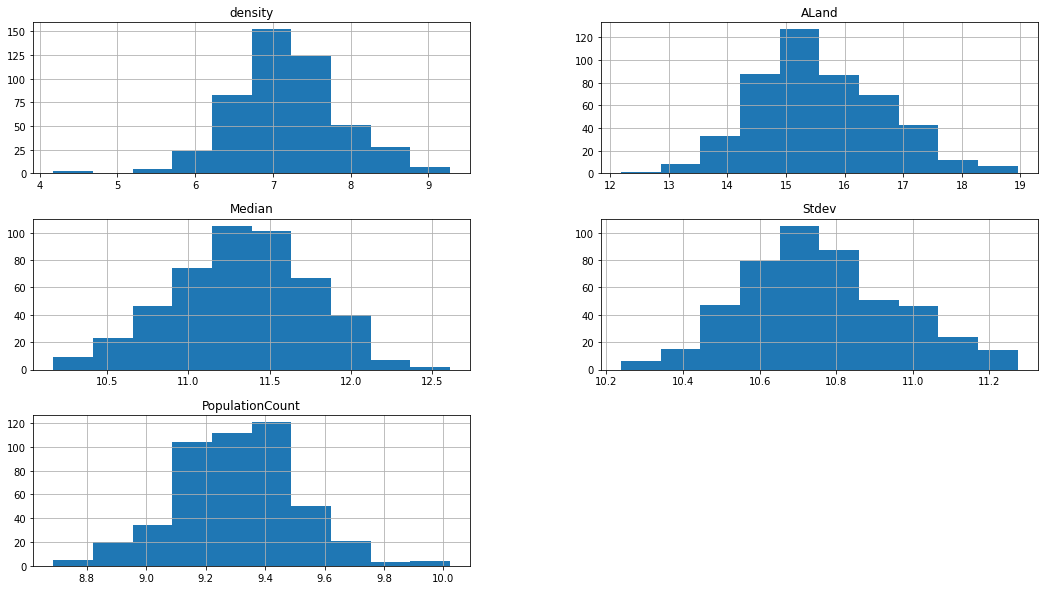

In [22]:
# Visual exploratory after treated skewed variables 
merged_df1.hist(['density','ALand','Median','Stdev','PopulationCount'], figsize=(18,10))

In [107]:
# Correlation matrix after log transformation 
ContinuousCols=['Data_Value','density','ALand','Median','Stdev','PopulationCount']

# Creating the correlation matrix
CorrelationData=merged_df1[ContinuousCols].corr()
CorrelationData

,Data_Value,density,ALand,Median,Stdev,PopulationCount
Data_Value,1.000000,-0.134745,0.054588,-0.586828,-0.762066,-0.310988
density,-0.134745,1.000000,-0.628565,0.162130,0.273281,0.151459
ALand,0.054588,-0.628565,1.000000,-0.022769,-0.092701,0.032781
Median,-0.586828,0.162130,-0.022769,1.000000,0.599429,0.231569
Stdev,-0.762066,0.273281,-0.092701,0.599429,1.000000,0.216579
PopulationCount,-0.310988,0.151459,0.032781,0.231569,0.216579,1.000000


In [112]:
feature_cols=['density','ALand','PopulationCount','Median','Stdev']
X=merged_df1[feature_cols]
y=merged_df1['health_bad'] 
scaler = StandardScaler()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
# logistic regression
logreg=LogisticRegression()
pipeline = Pipeline([('transformer', scaler), ('estimator', logreg)])
logreg_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, logreg_predicted, output_dict=True)
logreg_result_df = pd.DataFrame(report).transpose()
logreg_result_df = logreg_result_df.rename(columns={"precision": "logreg_precision", "recall": "logreg_recall", "f1-score": "logreg_f1score"})
logreg_result_df = logreg_result_df.drop(columns={'support'})
logreg_result_df = logreg_result_df.drop(index={'macro avg','weighted avg'})
logreg_result_df

,logreg_precision,logreg_recall,logreg_f1score
0,0.811404,0.780591,0.795699
1,0.788618,0.818565,0.803313
accuracy,0.799578,0.799578,0.799578


In [114]:
svm1 = svm.SVC(kernel='linear')
pipeline = Pipeline([('transformer', scaler), ('estimator', svm1)])
svm1_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, svm1_predicted, output_dict=True)
svm1_result_df = pd.DataFrame(report).transpose()
svm1_result_df = svm1_result_df.rename(columns={"precision": "svm1_precision", "recall": "svm1_recall", "f1-score": "svm1_f1score"})
svm1_result_df = svm1_result_df.drop(columns={'support'})
svm1_result_df = svm1_result_df.drop(index={'macro avg','weighted avg'})
svm1_result_df
#svm2 = svm.SVC(kernel='linear', C=2)
#svm3 = svm.SVC(kernel='linear', C=3)

,svm1_precision,svm1_recall,svm1_f1score
0,0.812227,0.784810,0.798283
1,0.791837,0.818565,0.804979
accuracy,0.801688,0.801688,0.801688


In [115]:
svm2 = svm.SVC(kernel='linear',C=2)
pipeline = Pipeline([('transformer', scaler), ('estimator', svm2)])
svm2_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, svm2_predicted, output_dict=True)
svm2_result_df = pd.DataFrame(report).transpose()
svm2_result_df = svm2_result_df.rename(columns={"precision": "svm2_precision", "recall": "svm2_recall", "f1-score": "svm2_f1score"})
svm2_result_df = svm2_result_df.drop(columns={'support'})
svm2_result_df = svm2_result_df.drop(index={'macro avg','weighted avg'})
svm2_result_df

,svm2_precision,svm2_recall,svm2_f1score
0,0.813043,0.789030,0.800857
1,0.795082,0.818565,0.806653
accuracy,0.803797,0.803797,0.803797


In [116]:
svm3 = svm.SVC(kernel='linear',C=3)
pipeline = Pipeline([('transformer', scaler), ('estimator', svm3)])
svm3_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, svm3_predicted, output_dict=True)
svm3_result_df = pd.DataFrame(report).transpose()
svm3_result_df = svm3_result_df.rename(columns={"precision": "svm3_precision", "recall": "svm3_recall", "f1-score": "svm3_f1score"})
svm3_result_df = svm3_result_df.drop(columns={'support'})
svm3_result_df = svm3_result_df.drop(index={'macro avg','weighted avg'})
svm3_result_df

,svm3_precision,svm3_recall,svm3_f1score
0,0.813043,0.789030,0.800857
1,0.795082,0.818565,0.806653
accuracy,0.803797,0.803797,0.803797


In [117]:
DecisionTree = tree.DecisionTreeClassifier()
pipeline = Pipeline([('transformer', scaler), ('estimator', DecisionTree)])
DecisionTree_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, DecisionTree_predicted, output_dict=True)
DecisionTree_result_df = pd.DataFrame(report).transpose()
DecisionTree_result_df = DecisionTree_result_df.rename(columns={"precision": "DecisionTree_precision", "recall": "DecisionTree_recall", "f1-score": "DecisionTree_f1score"})
DecisionTree_result_df = DecisionTree_result_df.drop(columns={'support'})
DecisionTree_result_df = DecisionTree_result_df.drop(index={'macro avg','weighted avg'})
DecisionTree_result_df

,DecisionTree_precision,DecisionTree_recall,DecisionTree_f1score
0,0.733624,0.708861,0.721030
1,0.718367,0.742616,0.730290
accuracy,0.725738,0.725738,0.725738


In [118]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
GBoost1 = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=.05,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
pipeline = Pipeline([('transformer', scaler), ('estimator', GBoost1)])
GBoost1_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, GBoost1_predicted, output_dict=True)
GBoost1_result_df = pd.DataFrame(report).transpose()
GBoost1_result_df = GBoost1_result_df.rename(columns={"precision": "GBoost1_precision", "recall": "GBoost1_recall", "f1-score": "GBoost1_f1score"})
GBoost1_result_df = GBoost1_result_df.drop(columns={'support'})
GBoost1_result_df = GBoost1_result_df.drop(index={'macro avg','weighted avg'})
GBoost1_result_df

,GBoost1_precision,GBoost1_recall,GBoost1_f1score
0,0.830275,0.763713,0.795604
1,0.781250,0.843882,0.811359
accuracy,0.803797,0.803797,0.803797


In [119]:
GBoost2 = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=.1,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
pipeline = Pipeline([('transformer', scaler), ('estimator', GBoost2)])
GBoost2_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, GBoost2_predicted, output_dict=True)
GBoost2_result_df = pd.DataFrame(report).transpose()
GBoost2_result_df = GBoost2_result_df.rename(columns={"precision": "GBoost2_precision", "recall": "GBoost2_recall", "f1-score": "GBoost2_f1score"})
GBoost2_result_df = GBoost2_result_df.drop(columns={'support'})
GBoost2_result_df = GBoost2_result_df.drop(index={'macro avg','weighted avg'})
GBoost2_result_df

,GBoost2_precision,GBoost2_recall,GBoost2_f1score
0,0.827434,0.789030,0.807775
1,0.798387,0.835443,0.816495
accuracy,0.812236,0.812236,0.812236


In [120]:
GBoost3 = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=.25,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
pipeline = Pipeline([('transformer', scaler), ('estimator', GBoost3)])
GBoost3_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, GBoost3_predicted, output_dict=True)
GBoost3_result_df = pd.DataFrame(report).transpose()
GBoost3_result_df = GBoost3_result_df.rename(columns={"precision": "GBoost3_precision", "recall": "GBoost3_recall", "f1-score": "GBoost3_f1score"})
GBoost3_result_df = GBoost3_result_df.drop(columns={'support'})
GBoost3_result_df = GBoost3_result_df.drop(index={'macro avg','weighted avg'})
GBoost3_result_df

,GBoost3_precision,GBoost3_recall,GBoost3_f1score
0,0.805310,0.767932,0.786177
1,0.778226,0.814346,0.795876
accuracy,0.791139,0.791139,0.791139


In [121]:
GBoost4 = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=.5,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
pipeline = Pipeline([('transformer', scaler), ('estimator', GBoost4)])
GBoost4_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, GBoost4_predicted, output_dict=True)
GBoost4_result_df = pd.DataFrame(report).transpose()
GBoost4_result_df = GBoost4_result_df.rename(columns={"precision": "GBoost4_precision", "recall": "GBoost4_recall", "f1-score": "GBoost4_f1score"})
GBoost4_result_df = GBoost4_result_df.drop(columns={'support'})
GBoost4_result_df = GBoost4_result_df.drop(index={'macro avg','weighted avg'})
GBoost4_result_df

,GBoost4_precision,GBoost4_recall,GBoost4_f1score
0,0.813636,0.755274,0.783370
1,0.771654,0.827004,0.798371
accuracy,0.791139,0.791139,0.791139


In [122]:
GBoost5 = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=.75,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
pipeline = Pipeline([('transformer', scaler), ('estimator', GBoost5)])
GBoost5_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, GBoost5_predicted, output_dict=True)
GBoost5_result_df = pd.DataFrame(report).transpose()
GBoost5_result_df = GBoost5_result_df.rename(columns={"precision": "GBoost5_precision", "recall": "GBoost5_recall", "f1-score": "GBoost5_f1score"})
GBoost5_result_df = GBoost5_result_df.drop(columns={'support'})
GBoost5_result_df = GBoost5_result_df.drop(index={'macro avg','weighted avg'})
GBoost5_result_df

,GBoost5_precision,GBoost5_recall,GBoost5_f1score
0,0.796460,0.759494,0.777538
1,0.770161,0.805907,0.787629
accuracy,0.782700,0.782700,0.782700


In [123]:
GBoost6 = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=1,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
pipeline = Pipeline([('transformer', scaler), ('estimator', GBoost6)])
GBoost6_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, GBoost6_predicted, output_dict=True)
GBoost6_result_df = pd.DataFrame(report).transpose()
GBoost6_result_df = GBoost6_result_df.rename(columns={"precision": "GBoost6_precision", "recall": "GBoost6_recall", "f1-score": "GBoost6_f1score"})
GBoost6_result_df = GBoost6_result_df.drop(columns={'support'})
GBoost6_result_df = GBoost6_result_df.drop(index={'macro avg','weighted avg'})
GBoost6_result_df

,GBoost6_precision,GBoost6_recall,GBoost6_f1score
0,0.792373,0.789030,0.790698
1,0.789916,0.793249,0.791579
accuracy,0.791139,0.791139,0.791139


In [124]:
BalRandomForest = BalancedRandomForestClassifier(n_estimators=100,random_state=1)
pipeline = Pipeline([('transformer', scaler), ('estimator', BalRandomForest)])
BalRandomForest_predicted = cross_val_predict(pipeline, X, y, cv=10)
report = metrics.classification_report(y, BalRandomForest_predicted, output_dict=True)
BalRandomForest_result_df = pd.DataFrame(report).transpose()
BalRandomForest_result_df = BalRandomForest_result_df.rename(columns={"precision": "BalRandomForest_precision", "recall": "BalRandomForest_recall", "f1-score": "BalRandomForest_f1score"})
BalRandomForest_result_df = BalRandomForest_result_df.drop(columns={'support'})
BalRandomForest_result_df = BalRandomForest_result_df.drop(index={'macro avg','weighted avg'})
BalRandomForest_result_df

,BalRandomForest_precision,BalRandomForest_recall,BalRandomForest_f1score
0,0.799145,0.789030,0.794055
1,0.791667,0.801688,0.796646
accuracy,0.795359,0.795359,0.795359


In [125]:
from sklearn.model_selection import cross_validate
output = cross_validate(BalRandomForest, X, y, cv=10, scoring = 'accuracy', return_estimator =True)
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                 importance
Stdev              0.404094
Median             0.258998
PopulationCount    0.128475
ALand              0.109817
density            0.098615
Features sorted by their score for estimator 1:
                 importance
Stdev              0.420163
Median             0.247399
PopulationCount    0.123327
ALand              0.105507
density            0.103603
Features sorted by their score for estimator 2:
                 importance
Stdev              0.405467
Median             0.272427
PopulationCount    0.118436
ALand              0.106149
density            0.097522
Features sorted by their score for estimator 3:
                 importance
Stdev              0.403603
Median             0.245636
PopulationCount    0.131340
ALand              0.112320
density            0.107100
Features sorted by their score for estimator 4:
                 importance
Stdev              0.421022
Median             0.251035
Popu

In [126]:
#Custom metric functions
def custom_f1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def custom_recall(y_true, y_pred):
    TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = TP / (Positives+K.epsilon())    
    return recall 

def custom_precision(y_true, y_pred):
    TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))    
    precision = TP / (Pred_Positives+K.epsilon())
    return precision 

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras import backend as K

from sklearn.metrics import f1_score, make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve
#import numpy as np
scaler = StandardScaler()

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)
    
# K-fold Cross Validation model evaluation
fold_no = 1
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
    
for train_index, test_index in kfold.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Define the model architecture
    model = tf.keras.models.Sequential()
    # Fit the StandardScaler
    X_scaler = scaler.fit(x_train)
    # Scale the data
    X_train_scaled = X_scaler.transform(x_train)
    X_test_scaled = X_scaler.transform(x_test)

    # First hidden layer
    model.add(tf.keras.layers.Dense(units=3, input_dim=5, activation="relu"))
    # Second hidden layer
    #model.add(tf.keras.layers.Dense(units=2, activation="relu"))
    
    # Output layer
    model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    # Compile the model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[custom_precision, custom_recall, custom_f1,"accuracy"])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(X_train_scaled, y_train,
              batch_size=10,
              epochs=50,
              verbose=0)

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)
    #print(scores)
    #print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%; {model.metrics_names[2]} of {scores[2]*100}%; {model.metrics_names[3]} of {scores[3]*100}%; {model.metrics_names[4]} of {scores[4]*100}%')

    loss_per_fold.append(scores[0])
    precision_per_fold.append(scores[1] * 100)
    recall_per_fold.append(scores[2] * 100)
    f1_per_fold.append(scores[3] * 100)  
    acc_per_fold.append(scores[4] * 100)
        
    y_test = model.predict(X_test_scaled)
    y_test_pred_cat = (np.asarray(y_test)).round()
    
    ### (3) Get performance metrics after each fold
    #f1, precision, recall = f1_score(y_test, y_test_pred_cat), precision_score(y_test, y_test_pred_cat), recall_score(y_test, y_test_pred_cat)
    
    print(f'Fold {fold_no} Loss: %f' %scores[0])
    #precision_per_fold.append(precision * 100)
    
    print(f'Fold {fold_no} Precision: %f' %scores[1])
    #precision_per_fold.append(precision * 100)

    print(f'Fold {fold_no} Recall: %f' %scores[2])
    #recall_per_fold.append(recall * 100)

    print(f'Fold {fold_no} F1 score: %f' %scores[3])
    #f1_per_fold.append(f1 * 100)
    
    print(f'Fold {fold_no} Accuracy: %f' %scores[4])
 
    # Increase fold number
    fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(precision_per_fold)} (+- {np.std(precision_per_fold)})')
print(f'> Recall: {np.mean(recall_per_fold)} (+- {np.std(recall_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)} (+- {np.std(f1_per_fold)})')
print('------------------------------------------------------------------------')   



------------------------------------------------------------------------
Training for fold 1 ...
Fold 1 Loss: 0.451621
Fold 1 Precision: 0.690476
Fold 1 Recall: 0.690476
Fold 1 F1 score: 0.690476
Fold 1 Accuracy: 0.750000
------------------------------------------------------------------------
Training for fold 2 ...
Fold 2 Loss: 0.440754
Fold 2 Precision: 0.817460
Fold 2 Recall: 0.763889
Fold 2 F1 score: 0.788889
Fold 2 Accuracy: 0.770833
------------------------------------------------------------------------
Training for fold 3 ...
Fold 3 Loss: 0.424059
Fold 3 Precision: 0.763889
Fold 3 Recall: 0.968750
Fold 3 F1 score: 0.854167
Fold 3 Accuracy: 0.833333
------------------------------------------------------------------------
Training for fold 4 ...
Fold 4 Loss: 0.424491
Fold 4 Precision: 0.718750
Fold 4 Recall: 0.799020
Fold 4 F1 score: 0.751082
Fold 4 Accuracy: 0.770833
------------------------------------------------------------------------
Training for fold 5 ...
Fold 5 Loss: 0.

In [128]:
scaler = StandardScaler()

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)
    
# K-fold Cross Validation model evaluation
fold_no = 1
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []


for train_index, test_index in kfold.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Define the model architecture
    model = tf.keras.models.Sequential()
    # Fit the StandardScaler
    X_scaler = scaler.fit(x_train)
    # Scale the data
    X_train_scaled = X_scaler.transform(x_train)
    X_test_scaled = X_scaler.transform(x_test)

    # First hidden layer
    model.add(tf.keras.layers.Dense(units=50, input_dim=5, activation="relu"))
    # Second hidden layer
    model.add(tf.keras.layers.Dense(units=20, activation="relu"))
    # Third hidden layer
    #model.add(tf.keras.layers.Dense(units=2, activation="relu"))
    # Output layer
    model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    # Compile the model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[custom_precision, custom_recall, custom_f1,"accuracy"])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(X_train_scaled, y_train,
              batch_size=10,
              epochs=50,
              verbose=0)

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=1)
    #print(scores)
    #print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%; {model.metrics_names[2]} of {scores[2]*100}%; {model.metrics_names[3]} of {scores[3]*100}%; {model.metrics_names[4]} of {scores[4]*100}%')


    loss_per_fold.append(scores[0])
    precision_per_fold.append(scores[1] * 100)
    recall_per_fold.append(scores[2] * 100)
    f1_per_fold.append(scores[3] * 100)  
    acc_per_fold.append(scores[4] * 100)
        
    y_test = model.predict(X_test_scaled)
    y_test_pred_cat = (np.asarray(y_test)).round()
    
    ### (3) Get performance metrics after each fold
    #f1, precision, recall = f1_score(y_test, y_test_pred_cat), precision_score(y_test, y_test_pred_cat), recall_score(y_test, y_test_pred_cat)
    
    
    print(f'Fold {fold_no} Loss: %f' %scores[0])
    #precision_per_fold.append(precision * 100)
    
    print(f'Fold {fold_no} Precision: %f' %scores[1])
    #precision_per_fold.append(precision * 100)

    print(f'Fold {fold_no} Recall: %f' %scores[2])
    #recall_per_fold.append(recall * 100)

    print(f'Fold {fold_no} F1 score: %f' %scores[3])
    #f1_per_fold.append(f1 * 100)
    
    print(f'Fold {fold_no} Accuracy: %f' %scores[4])
 
    # Increase fold number
    fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(precision_per_fold)} (+- {np.std(precision_per_fold)})')
print(f'> Recall: {np.mean(recall_per_fold)} (+- {np.std(recall_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)} (+- {np.std(f1_per_fold)})')
print('------------------------------------------------------------------------')   



------------------------------------------------------------------------
Training for fold 1 ...
2/2 [==============================] - 0s 2ms/step - loss: 0.4732 - custom_precision: 0.8013 - custom_recall: 0.7418 - custom_f1: 0.7692 - accuracy: 0.8125
Fold 1 Loss: 0.473155
Fold 1 Precision: 0.801282
Fold 1 Recall: 0.741758
Fold 1 F1 score: 0.769231
Fold 1 Accuracy: 0.812500
------------------------------------------------------------------------
Training for fold 2 ...
2/2 [==============================] - 0s 2ms/step - loss: 0.4981 - custom_precision: 0.7889 - custom_recall: 0.7904 - custom_f1: 0.7868 - accuracy: 0.7708
Fold 2 Loss: 0.498150
Fold 2 Precision: 0.788889
Fold 2 Recall: 0.790441
Fold 2 F1 score: 0.786765
Fold 2 Accuracy: 0.770833
------------------------------------------------------------------------
Training for fold 3 ...
2/2 [==============================] - 0s 3ms/step - loss: 0.5255 - custom_precision: 0.6875 - custom_recall: 0.7708 - custom_f1: 0.7232 - accuracy